# Testing Dose Calculator Function
I'll do initial testing stuff and miscellaneous things here and then add them into `dose_calculator_tests.py`.

In [8]:
%pylab ipympl 
%load_ext autoreload
import siddon as sd
import dose_calculator as dc
import imshow_slider as ims
from topas2numpy import BinnedResult
import pickle
from scipy import interpolate
import spekpy as sp

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing Dose One
This is a 120 keV monoenergetic pencil beam in an ellipse shape moving from positive to negative z. The medium is a 5cm x 5cm x 5cm block with 50 voxels in each axis.

In [11]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**8 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/Kernels/WaterKernel6.csv'
kernel_size = (2,2,2) # cm 

# effective distance from center of kernel 
eff_dist = (1,1,1) # cm

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filename,kernelname,kernel_size,eff_dist,num_cores)


(44.05, 44.05, 88.6) 0.0
(44.05, 44.05, 93.55000000000001) 0.0
(44.05, 44.05, 83.65) 0.0
(44.05, 44.05, 78.7) 0.0
(44.05, 44.05, 63.85) 0.0
(44.05, 44.05, 73.75) 0.0
(44.05, 44.05, 44.05) 1.7575695168343907e-08
(44.05, 44.05, 53.95) 7.539014129976516e-08
(44.05, 44.05, 58.9) 0.0
(44.05, 44.05, 68.8) 0.0
(44.05, 44.05, 24.25) 0.0
(44.05, 44.05, 19.299999999999997) 0.0
(44.05, 44.05, 29.2) 0.0
(44.05, 44.05, 39.1) 0.0
(44.05, 44.05, 34.15) 0.0
(44.05, 44.05, 49.0) 2.604981823833065e-07
(44.05, 44.05, 14.350000000000001) 0.0
(44.05, 44.05, 9.399999999999999) 0.0
(44.05, 44.05, 4.449999999999996) 0.0
(49.0, 44.05, 58.9) 0.0
(49.0, 44.05, 73.75) 0.0
(49.0, 44.05, 68.8) 0.0
(49.0, 44.05, 53.95) 0.0
(49.0, 44.05, 78.7) 0.0
(49.0, 44.05, 93.55000000000001) 0.0
(49.0, 44.05, 83.65) 0.0
(49.0, 44.05, 39.1) 0.0
(49.0, 44.05, 88.6) 0.0
(49.0, 44.05, 63.85) 0.0
(49.0, 44.05, 24.25) 0.0
(49.0, 44.05, 34.15) 0.0
(49.0, 44.05, 49.0) 4.939633906189958e-05
(49.0, 44.05, 44.05) 6.650775703067797e-06
(49.

In [ ]:
with 16 "cores":
CPU times: user 9.09 s, sys: 1.1 s, total: 10.2 s
Wall time: 13min 36s

In [12]:
pickle.dump(dose,open('dose_27.pickle','wb'))

## Testing Dose Two


In [2]:
s = sp.Spek(kvp=120,th=12) # Generate a spectrum (80 kV, 12 degree tube angle)
s.filter('Al', 4.0) # Filter by 4 mm of Al

hvl = s.get_hvl1() # Get the 1st HVL in mm Al

# print(hvl) # Print out the HVL value (Python3 syntax)

beam_energy,fluence_0 = s.get_spectrum()
beam_energy = beam_energy/1000

In [3]:
# for fluence in fluence_0:
#     print(fluence/sum(fluence_0),end=' ')
len(beam_energy)

238

In [4]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (2,2,2) # cm 

# effective distance from center of kernel 
eff_dist = (0.1,0.1,0.1) # cm

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size,eff_dist,num_cores)


CPU times: user 9.15 s, sys: 1.01 s, total: 10.2 s
Wall time: 12min 17s


In [5]:
pickle.dump(dose,open('dosetest2_1.pickle','wb'))

## Testing Dose Four

In [2]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# number of rays 
num_rays = 300

rays = dc.MakeFanBeamRays(num_rays,np.pi/6,((x1,x2),(y1,y2),(z1,z2)),direction='y',adjust=0.025)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**8 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/ReverseEngineerKernel.csv'
kernel_size = (2,2,2) # cm 

# effective distance from center of kernel 
eff_dist = (0.01,0.01,0.01) # cm

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),rays,(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filename,kernelname,kernel_size,eff_dist,num_cores)


CPU times: user 16.9 s, sys: 11.7 s, total: 28.6 s
Wall time: 43min 40s


In [ ]:
# with previous code (slow), 16 cores, and 10 rays
CPU times: user 10.5 s, sys: 2.04 s, total: 12.6 s
Wall time: 29min 31s

In [3]:
pickle.dump(dose,open('dose4_4.pickle','wb'))

## Testing Dose Five 
- like TestingDose1 except 256x256x256 voxels!

In [2]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 257
Ny = 257
Nz = 257

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**8 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (2,2,2) # cm 

# effective distance from center of kernel 
eff_dist = (0.5,0.5,0.5) # cm

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filename,kernelname,kernel_size,eff_dist,num_cores)


Process ForkPoolWorker-56:
Process ForkPoolWorker-47:
Process ForkPoolWorker-49:
Process ForkPoolWorker-55:
Process ForkPoolWorker-53:
Process ForkPoolWorker-54:
Process ForkPoolWorker-48:
Process ForkPoolWorker-46:
Process ForkPoolWorker-50:
Process ForkPoolWorker-44:
Process ForkPoolWorker-52:
Process ForkPoolWorker-42:
Process ForkPoolWorker-51:
Process ForkPoolWorker-45:
Process ForkPoolWorker-43:
Process ForkPoolWorker-41:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 25

KeyboardInterrupt: 

## Reverse Engineering Kernel

In [2]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**8 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/ReverseEngineerKernel.csv'
kernel_size = (0.9,0.9,0.9) # cm 

# effective distance from center of kernel 
eff_dist = (1,1,1) # cm

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filename,kernelname,kernel_size,eff_dist,num_cores)


(3.0, 3.0, 13.0) 0.0
(3.0, 3.0, 10.0) 0.0
(3.0, 3.0, 12.0) 0.0
(3.0, 3.0, 6.0) 6.419899895270212e-07
(3.0, 3.0, 11.0) 0.0
(3.0, 3.0, 9.0) 0.0
(3.0, 3.0, 5.0) 0.0006659781594462842(3.0, 3.0, 3.0) 
4.8628067551665585e-05
(3.0, 3.0, 8.0) 7.422201649956291e-08
(3.0, 3.0, 2.0) 3.230064520680644e-07
(3.0, 3.0, 7.0) 2.528025660796346e-07
(3.0, 3.0, 4.0) 0.0018144549474584369
(3.0, 3.0, -1.0) 0.0
(3.0, 3.0, 1.0) 6.413210910409552e-08(3.0, 3.0, 0.0)
 3.0111572516624414e-08
(3.0, 3.0, -2.0) 0.0
(3.0, 3.0, -3.0) 0.0
(3.0, 3.0, -4.0) 0.0
(3.0, 3.0, -5.0) 0.0
(4.0, 3.0, 13.0) 0.0
(4.0, 3.0, 12.0) 0.0
(4.0, 3.0, 8.0) 8.480457472828421e-08
(4.0, 3.0, 6.0) 9.194167009919759e-07
(4.0, 3.0, 10.0) 0.0
(4.0, 3.0, 11.0) 0.0
(4.0, 3.0, 7.0) 1.9779083910200444e-07
(4.0, 3.0, 3.0) 0.0004282900914994053
(4.0, 3.0, 9.0) 0.0
(4.0, 3.0, 5.0) 0.012707327037807283
(4.0, 3.0, 4.0) 0.0020735952439145592
(4.0, 3.0, 1.0) 8.497772198892075e-08
(4.0, 3.0, 0.0) 8.833288777891727e-08
(4.0, 3.0, 2.0) 2.5793574744466066e-07


In [3]:
pickle.dump(dose,open('dose_24.pickle','wb'))

## Other Stuff

In [ ]:
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)
rays = [((x1,x2),(),(z1,z2)) for ]

In [18]:
'''
making mu interpolation function
'''
filename = 'energy_absorption_coeffs.txt'

coeff_array = np.loadtxt(filename,skiprows=2,dtype=float)

# exponentially interpolate 
mu_linear = interpolate.interp1d(np.log(coeff_array.T[0]),np.log(coeff_array.T[1]),kind='linear',fill_value='extrapolate')
mu_l = lambda energy, material: np.exp(mu_linear(np.log(energy))) # CHANGE THIS LATER TO A REAL FUNCTION

mu_mass = interpolate.interp1d(np.log(coeff_array.T[0]),np.log(coeff_array.T[2]),kind='linear',fill_value='extrapolate')
mu_m = lambda energy, material: np.exp(mu_mass(np.log(energy))) # CHANGE THIS LATER TO A REAL FUNCTION

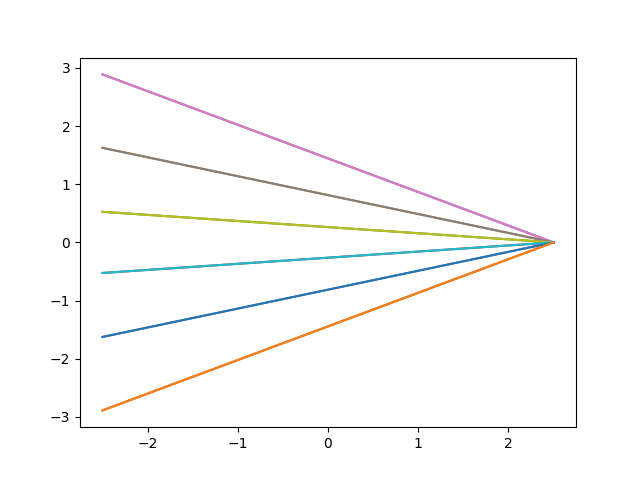

In [9]:
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)
rays = dc.MakeFanBeamRays(12,np.pi/6,((x1,x2),(y1,y2),(z1,z2)),direction='y',adjust=0.025)

ifig=1;close(ifig);figure(ifig)
for ray in rays:
    plot(ray[2],ray[1])

#### Testing TERMA with Polyenergetic

In [6]:
%%time
# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 10
Ny = 10
Nz = 10

# distances between the x,y,z planes (also the lengths of the sides of the voxels)
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0.2,0.5)
y1,y2 = (0.4,0.8)
z1,z2 = (4,-6)

# initial plane coordinates
xplane1 = 0
yplane1 = 0
zplane1 = 0

# beam info and filename
# beam_energy = 0.120 # in MeV
# fluence_0 = 1 # photon/cm^2
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (1,1,1) # cm 

# number of cores to use 
num_cores = 8

# sd.Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,mu_l,mu_m)

# dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size,num_cores)

# sd.TERMA?
terma

NameError: name 'mu_l' is not defined

In [7]:
mu_l(0.12,'water')

0.1613015136737795

In [2]:
# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 16
Ny = 16
Nz = 16

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.05
dy = 0.05
dz = 0.05

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (-0.8,0.8)

# initial plane coordinates
xplane1 = -0.8
yplane1 = -0.8
zplane1 = -0.8

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**8 # photon/cm^2
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (1,1,1) # cm 

# number of cores to use 
num_cores = 8

# siddon = sd.Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1))
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,mu)
dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filename,kernelname,kernel_size,num_cores)


In [3]:
shape(dose)

(15, 15, 15)

In [8]:
s = sp.Spek(kvp=120,th=12) # Generate a spectrum (80 kV, 12 degree tube angle)
s.filter('Al', 4.0) # Filter by 4 mm of Al

hvl = s.get_hvl1() # Get the 1st HVL in mm Al

# print(hvl) # Print out the HVL value (Python3 syntax)

beam_energy,fluence_0 = s.get_spectrum()

# sp.Spek?

In [12]:
%%time
# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 10
Ny = 10
Nz = 10

# distances between the x,y,z planes (also the lengths of the sides of the voxels)
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0.2,0.5)
y1,y2 = (0.4,0.8)
z1,z2 = (4,-6)

# initial plane coordinates
xplane1 = 0
yplane1 = 0
zplane1 = 0

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 1 # photon/cm^2
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (2,2,2) # cm 

# effective distance from center of kernel 
eff_dist = (0.5,0.5,0.5) # cm

# number of cores to use 
num_cores = 8

# sd.Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filename,kernelname,kernel_size,eff_dist,num_cores)


CPU times: user 8.05 s, sys: 148 ms, total: 8.2 s
Wall time: 8.57 s


*I'm guessing a lot of this time is coming from interpolating the kernel at the beginning, maybe I'll try to run some tests with bigger arrays*

with 8 cores:
CPU times: user 7.96 s, sys: 151 ms, total: 8.11 s
Wall time: 8.55 s

with 4 cores:
CPU times: user 7.99 s, sys: 140 ms, total: 8.14 s
Wall time: 8.76 s

In [19]:
for n in range(len(voxel_info)):
    for voxel in voxel_info[n]:
        if abs(voxel['d'] - 0.1) > 0.00000001:
            print('oops')

In [7]:
dose_im_array = []

for dose_row in dose:
    dose_im_array.append(dose_row['energy'])

dose_im_array = np.array(dose_im_array)

dose_im_array = dose_im_array.reshape(Nx-1,Ny-1,Nz-1)

pickle.dump(dose_im_array,open('dose_test.pickle','wb'))

In [21]:
a = array([1,2])
b = []

6

In [27]:
interaction_zone = []
for j in kernel_array[47:52]:
    for k in j[47:52]:
        interaction_zone.append(k[47:52])
interaction_zone = np.array(interaction_zone)
np.mean(interaction_zone)

716.6427428588867

### Slider to Look at 3D Stuff

In [9]:
kernelname = '../Topas/RealKernel1.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [10]:
kernelname = '../Topas/ReverseEngineerKernel.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [6]:
kernelname = '../Topas/Kernels/WaterKernel6.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [5]:
kernelname = '../Topas/BoneKernel1.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [6]:
data = BinnedResult('../Topas/EnergyFluence.csv').data['Sum']

In [7]:
where(data==np.max(data))

(array([25]), array([24]), array([49]))

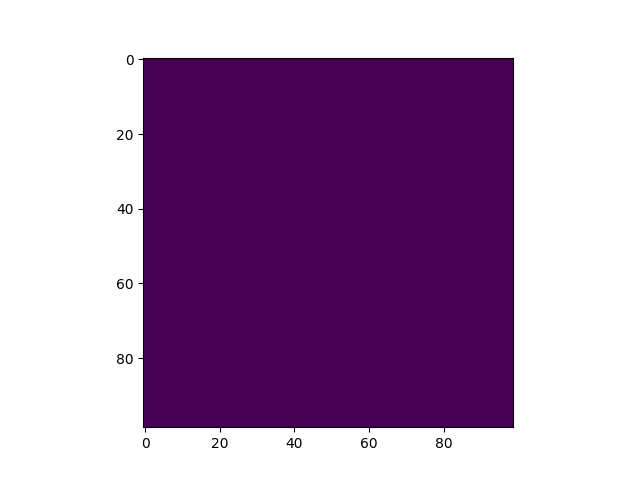

In [7]:
fig,ax,controls = ims.slider(kernel_array)

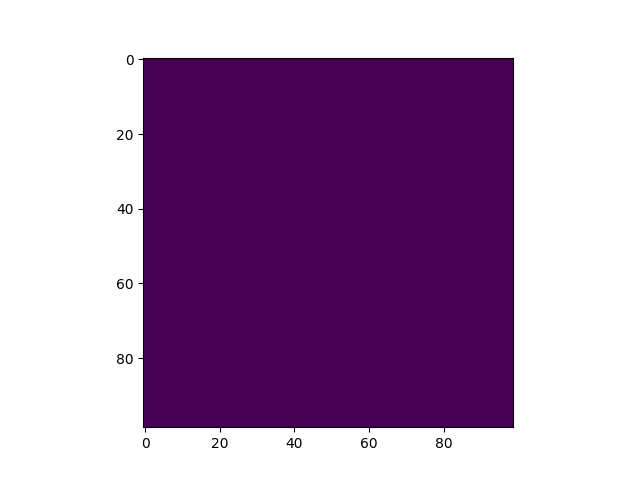

In [8]:
fig,ax,controls = ims.slider(kernel_array)

In [7]:
(int(np.floor(len(kernel_array)/2)),int(np.floor(len(kernel_array[0])/2)),int(np.floor(len(kernel_array[0][0])/2)))

(49, 49, 49)

In [16]:
my_dose_array = pickle.load(open('dose_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

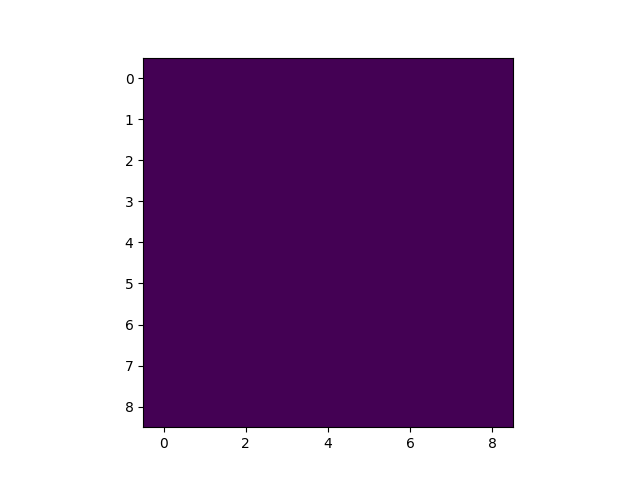

In [15]:
fig,ax,controls = ims.slider(dose)

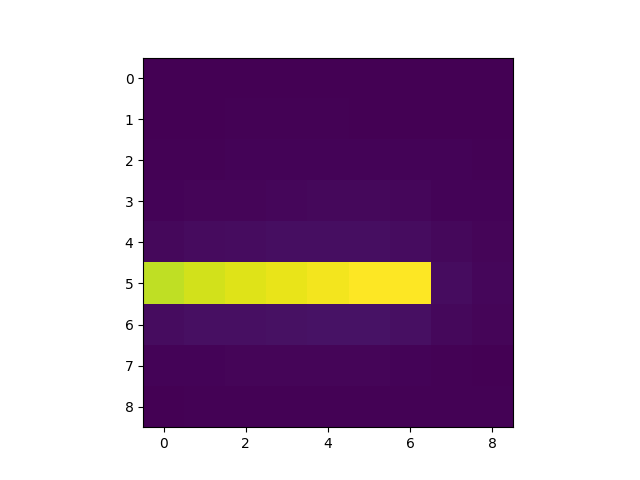

In [18]:
close(5);figure(5)
imshow(dose[4])

In [9]:
print(sum(my_dose_array)*1.602e-10,sum(mc_dose_array))

0.03631941168294036 0.0009266880412018293


### Tests for Superposition

In [13]:
test_kernel = array([[[0,0,0],[0,0.1,0],[0,0,0]],
                     [[0,0.1,0],[0.1,0.4,0.1],[0,0.1,0]],
                     [[0,0,0],[0,0.1,0],[0,0,0]]])

In [14]:
test_array_1 = array([[[1,1],[1,1]],
                      [[1,1],[1,1]]])

test_array_2 = array([[[1,1],[0,0]],
                      [[0,0],[0,0]]])

In [15]:
test_array = test_array_2

voxel_info_1 = []
n=0
for x in range(len(test_array)):
    for y in range(len(test_array[0])):
        for z in range(len(test_array[0][0])):
            voxel_info_1.append({})
            voxel_info_1[n]['indices'] = (x+1,y+1,z+1)
            voxel_info_1[n]['TERMA'] = test_array[x][y][z]
            voxel_info_1[n]['d'] = 0.1
            n += 1

voxel_info_1

[{'indices': (1, 1, 1), 'TERMA': 1, 'd': 0.1},
 {'indices': (1, 1, 2), 'TERMA': 1, 'd': 0.1},
 {'indices': (1, 2, 1), 'TERMA': 0, 'd': 0.1},
 {'indices': (1, 2, 2), 'TERMA': 0, 'd': 0.1},
 {'indices': (2, 1, 1), 'TERMA': 0, 'd': 0.1},
 {'indices': (2, 1, 2), 'TERMA': 0, 'd': 0.1},
 {'indices': (2, 2, 1), 'TERMA': 0, 'd': 0.1},
 {'indices': (2, 2, 2), 'TERMA': 0, 'd': 0.1}]

In [16]:
sd.Superposition(test_kernel,(3,3,3),(3,3,3),(0.75,0.75,0.75),[voxel_info_1],4)
# sd.Superposition?

array([[[0.50758621, 0.50758621],
        [0.20965517, 0.20965517]],

       [[0.20965517, 0.20965517],
        [0.07310345, 0.07310345]]])

In [25]:
x1,x2 = (2,2.1)
y1,y2 = (0,0)
z1,z2 = (1,1)

dc.Superposition(test_kernel,(3,3,3),(3,3,3),(0.75,0.75,0.75),[voxel_info_1],[((x1,x2),(y1,y2),(z1,z2))],(8,8,8),4)
# dc.Superposition?

array([[[0.50758621, 0.50758621],
        [0.20965517, 0.20965517]],

       [[0.20965517, 0.20965517],
        [0.07310345, 0.07310345]]])